In [1]:
# The code was removed by Watson Studio for sharing.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df_data_1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
df2=df_data_1.drop(columns=['id','date'])

In [11]:
df2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
df2['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [14]:
import seaborn as sns

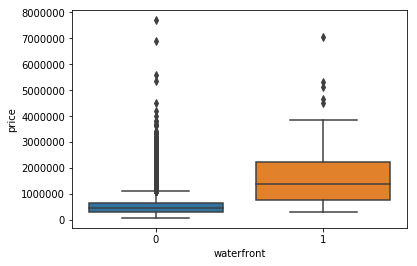

In [15]:
ax = sns.boxplot(x="waterfront", y="price", data=df2)

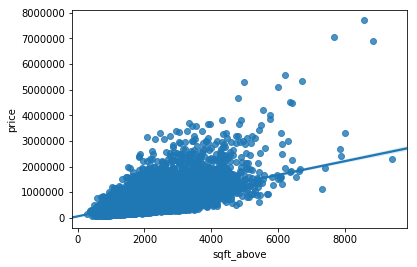

In [16]:
sns.regplot(x="sqft_above", y="price", data=df2)

In [40]:
df3=df2.iloc[:, [0,3]]
df3.isnull().sum()


price          0
sqft_living    0
dtype: int64

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = df3[['sqft_living']]
y = df3[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
lm =LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [63]:
print(lm.intercept_)
print(lm.coef_)
r2 = r2_score(y_test, y_pred)
print("R2 ",r2)

[-48257.06359103]
[[283.96855716]]
R2  0.47915772372653753


In [68]:
df4=df2.loc[:, ["price","floors","waterfront","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
df4

,price,floors,waterfront,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living
0,221900.0,1.0,0,47.5112,3,0,0,1.00,1340,1180,7,1180
1,538000.0,2.0,0,47.7210,3,400,0,2.25,1690,2170,7,2570
2,180000.0,1.0,0,47.7379,2,0,0,1.00,2720,770,6,770
3,604000.0,1.0,0,47.5208,4,910,0,3.00,1360,1050,7,1960
4,510000.0,1.0,0,47.6168,3,0,0,2.00,1800,1680,8,1680
5,1225000.0,1.0,0,47.6561,4,1530,0,4.50,4760,3890,11,5420
6,257500.0,2.0,0,47.3097,3,0,0,2.25,2238,1715,7,1715
7,291850.0,1.0,0,47.4095,3,0,0,1.50,1650,1060,7,1060
8,229500.0,1.0,0,47.5123,3,730,0,1.00,1780,1050,7,1780
9,323000.0,2.0,0,47.3684,3,0,0,2.50,2390,1890,7,1890


In [69]:
df4.isnull().sum()

price            0
floors           0
waterfront       0
lat              0
bedrooms         0
sqft_basement    0
view             0
bathrooms        0
sqft_living15    0
sqft_above       0
grade            0
sqft_living      0
dtype: int64

In [85]:
X = df4.iloc[:,1:12]
y = df4[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
lm =LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [86]:
print(lm.intercept_)
print(lm.coef_)
r2 = r2_score(y_test, y_pred)
print("R2 ",r2)

[-32550885.18476724]
[[-2.74544939e+04  6.27189230e+05  6.76554366e+05 -2.52986316e+04
   6.55003824e+01  6.71011348e+04 -5.39746554e+03  5.79595818e+00
   6.69557710e+01  7.92395037e+04  1.32456154e+02]]
R2  0.6515929603856143


In [92]:
X = df4.iloc[:,1:12]
y = df4[['price']]
from sklearn.preprocessing import PolynomialFeatures
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
lm = LinearRegression()
lm.fit(x_poly, y_train)
y_poly_pred = lm.predict(x_poly)

In [95]:
r2 = r2_score(y_train,y_poly_pred)
r2

0.7551028308258833

In [101]:
from sklearn.linear_model import Ridge
X = df4.iloc[:,1:12]
y = df4[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
rr = Ridge(alpha=0.1)
rr.fit(X_train, y_train)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [102]:
print(Ridge_train_score)
print(Ridge_test_score)

0.6587791231971702
0.6516008421836497
